In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#Importing train test split
from sklearn.model_selection import train_test_split

#Importing libraries for dealing with imbalanced data
from imblearn.under_sampling import RandomUnderSampler  
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler  
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

#Importing classification algorithms
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

#Importing evaluation metrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#To visualise feature importance
from matplotlib import pyplot
from sklearn.datasets import make_classification

print("Setup Complete")

Setup Complete


In [3]:
from google.colab import files
uploaded = files.upload()

Saving customer_booking.csv to customer_booking.csv


In [4]:
import io
customer_booking = pd.read_csv(io.BytesIO(uploaded['customer_booking.csv']), encoding='ISO-8859-1')


In [5]:
customer_booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# Exploratory data analysis

Text(0.5, 0, 'Countries from where most of the booking was made')

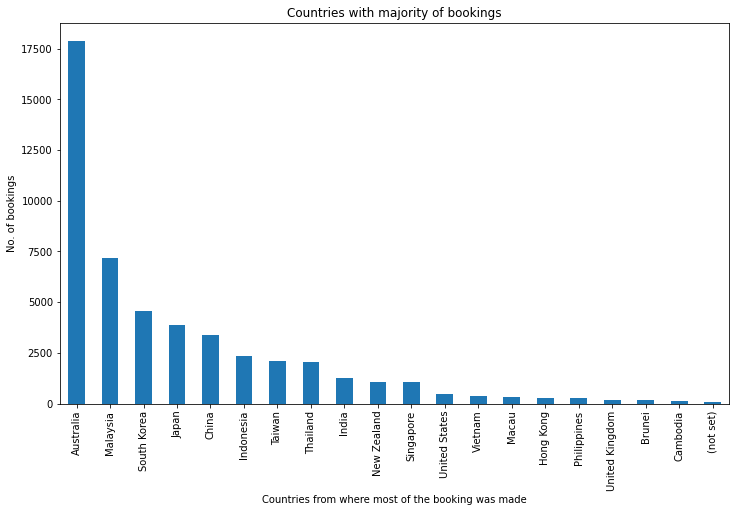

In [6]:
# Bar chart to plot the first 20 countries with majority of bookings

top_20 = customer_booking['booking_origin'].value_counts().head(20)
plt.figure(figsize=(12, 7))
top_20.plot(kind='bar', stacked=True, legend=False)

plt.title("Countries with majority of bookings")
plt.ylabel("No. of bookings")
plt.xlabel("Countries from where most of the booking was made")

The bar chart says that Australia is the country with highest bookings followed by Malaysia

In [7]:
# Creating a boolean mask to select rows where target is 0
mask = customer_booking['booking_complete'] == 0

# 0 indicates the completion of booking and 1 indicates the incompletion of booking

# Use the mask to select rows where target is 0
customer_booking_0 = customer_booking.loc[mask]

# Use the mask to select rows where target is 1
customer_booking_1 = customer_booking.loc[~mask]

In [8]:
customer_booking_0.shape

(42522, 14)

Text(0, 0.5, 'No. of departures')

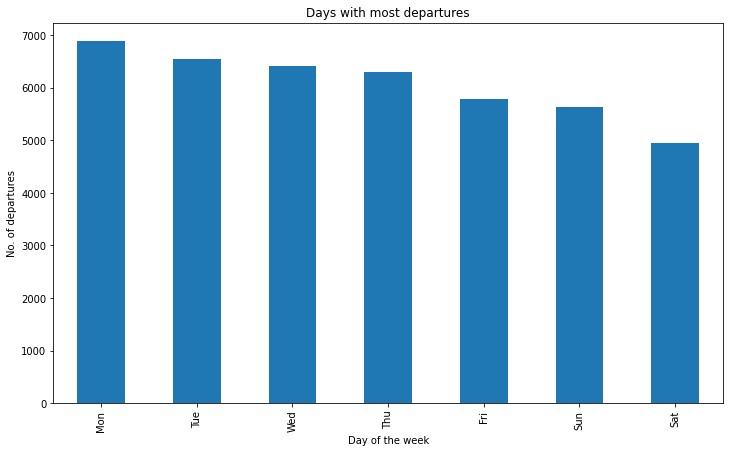

In [9]:
# To find the day of the week in which majority of flight departures take place

customer_booking_0['flight_day'].value_counts().plot(kind='bar', stacked=True,  legend=False, figsize=(12, 7))
plt.title("Days with most departures")
plt.xlabel("Day of the week")
plt.ylabel("No. of departures")

The data shows that most of the departures taken place in Monday followed by Tuesday and Wednesday

Text(0, 0.5, 'No. of bookings')

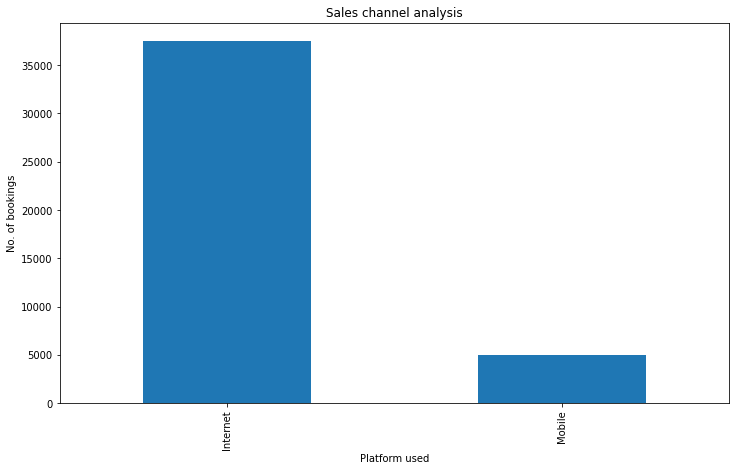

In [10]:
# To find which is the most used sales channel by customers

customer_booking_0['sales_channel'].value_counts().plot(kind='bar', stacked=True,  legend=False, figsize=(12, 7))
plt.title("Sales channel analysis")
plt.xlabel("Platform used")
plt.ylabel("No. of bookings")

Data shows that majority of customers used internet to book the ticket

Text(0, 0.5, 'No. of bookings')

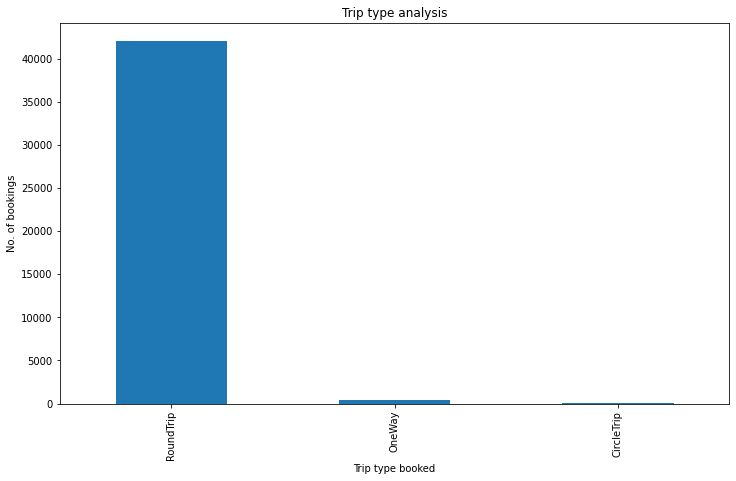

In [11]:
# To find which is the most used type of trip booking by customers

customer_booking_0['trip_type'].value_counts().plot(kind='bar', stacked=True,  legend=False, figsize=(12, 7))
plt.title("Trip type analysis")
plt.xlabel("Trip type booked")
plt.ylabel("No. of bookings")

Majority of customers are booking a round trip followed by one way

In [12]:
# To find the number of people who booked for an extra baggage.
# Here we are only looking at those people who completed the bookings

customer_booking_0['wants_extra_baggage'].value_counts()


1    27866
0    14656
Name: wants_extra_baggage, dtype: int64

In [13]:
# 0 indicates that the customer did not want a preferred seat in the booking
# 1 indicates that the customer did want a preferred seat.

customer_booking_0['wants_preferred_seat'].value_counts()

0    30303
1    12219
Name: wants_preferred_seat, dtype: int64

In [14]:
# 0 indicates that the customer did not want in-flight meals in the booking
# 1 indicates that the customer did want in-flight meals.

customer_booking_0['wants_in_flight_meals'].value_counts()

0    24593
1    17929
Name: wants_in_flight_meals, dtype: int64

In [15]:
# Here most of the people are going on 6 day trip followed by 5 day trip

customer_booking_0['length_of_stay'].value_counts()

6      6144
5      5916
4      4616
3      2333
17     1652
       ... 
284       1
342       1
313       1
379       1
229       1
Name: length_of_stay, Length: 323, dtype: int64

In [16]:
# Now we have to start converting categorical values to numerical values for training the data
# Converting the day of the week

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

customer_booking['flight_day_num'] = customer_booking['flight_day'].map(mapping)


customer_booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_num
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,6
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,6
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,3
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,6
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,6
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,7
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,6
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,1


In [17]:
# Converting sales channel to numerical

customer_booking['sales_channel'] = pd.Categorical(customer_booking['sales_channel'])
customer_booking['sales_channel'] = customer_booking['sales_channel'].cat.codes

In [18]:
# Converting trip type to numerical

customer_booking['trip_type'] = pd.Categorical(customer_booking['trip_type'])
customer_booking['trip_type'] = customer_booking['trip_type'].cat.codes

In [19]:
# Converting booking orgin to numerical

customer_booking['booking_origin'] = pd.Categorical(customer_booking['booking_origin'])
customer_booking['booking_origin'] = customer_booking['booking_origin'].cat.codes

In [20]:
# Converting route to numerical

customer_booking['route'] = pd.Categorical(customer_booking['route'])
customer_booking['route'] = customer_booking['route'].cat.codes

In [21]:
customer_booking = customer_booking.drop(columns=['flight_day'])

In [22]:
customer_booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_num
0,2,0,2,262,19,7,0,61,1,0,0,5.52,0,6
1,1,0,2,112,20,3,0,61,0,0,0,5.52,0,6
2,2,0,2,243,22,17,0,36,1,1,0,5.52,0,3
3,1,0,2,96,31,4,0,61,0,0,1,5.52,0,6
4,2,0,2,68,22,15,0,36,1,0,1,5.52,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,720,4,1,0,1,5.62,0,6
49996,1,0,2,111,6,4,720,4,0,0,0,5.62,0,7
49997,1,0,2,24,6,22,720,4,0,0,1,5.62,0,6
49998,1,0,2,15,6,11,720,4,1,0,1,5.62,0,1


Text(0, 0.5, 'No. of bookings')

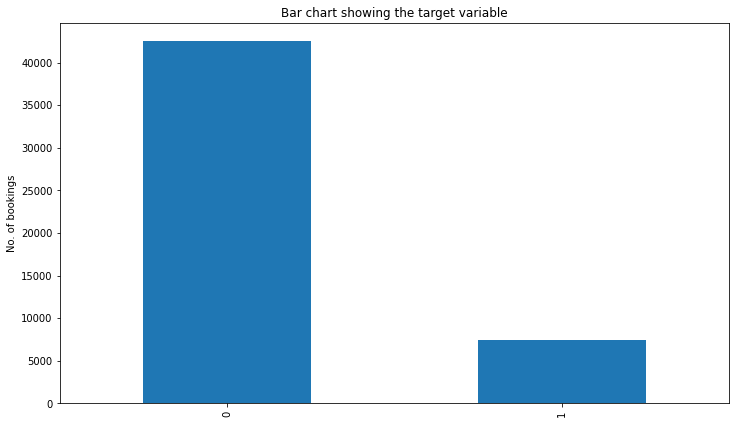

In [23]:
# Here 0 means booking completed and 1 means incomplete booking

customer_booking['booking_complete'].value_counts().plot(kind='bar', stacked=True,  legend=False, figsize=(12, 7))
plt.title("Bar chart showing the target variable")
plt.ylabel("No. of bookings")

Here we can see the data is highly imbalanced. So we have to balance the data

In [24]:
# Splitting the data into X and y

X = customer_booking.drop('booking_complete', axis =1)
y = customer_booking['booking_complete']

In [25]:
# Splitting the data into training and testing in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [26]:
y_test.value_counts()

0    10013
1     2487
Name: booking_complete, dtype: int64

In [27]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_day_num
0,2,0,2,262,19,7,0,61,1,0,0,5.52,6
1,1,0,2,112,20,3,0,61,0,0,0,5.52,6
2,2,0,2,243,22,17,0,36,1,1,0,5.52,3
3,1,0,2,96,31,4,0,61,0,0,1,5.52,6
4,2,0,2,68,22,15,0,36,1,0,1,5.52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,720,4,1,0,1,5.62,6
49996,1,0,2,111,6,4,720,4,0,0,0,5.62,7
49997,1,0,2,24,6,22,720,4,0,0,1,5.62,6
49998,1,0,2,15,6,11,720,4,1,0,1,5.62,1


In [28]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 13) (37500, 13) (12500, 13)


Now we have to balance the data using resampling technique. We will be only using oversampling because undersampling is not effective method.

# Oversampling using random oversampler

In [29]:
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_over.value_counts())

0    32509
1     4991
Name: booking_complete, dtype: int64
0    32509
1    32509
Name: booking_complete, dtype: int64


## Oversampling using SMOTE

In [30]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_smote.value_counts())

0    32509
1     4991
Name: booking_complete, dtype: int64
0    32509
1    32509
Name: booking_complete, dtype: int64


## Oversampling using Adaptive Synthetic Sampling (ADASYN)

In [31]:
adasyn = ADASYN(random_state=42)
X_over_ada, y_over_ada = adasyn.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_over_ada.value_counts())

0    32509
1     4991
Name: booking_complete, dtype: int64
0    32509
1    31881
Name: booking_complete, dtype: int64


## Oversampling using Borderline SMOTE

In [32]:
bsmote = BorderlineSMOTE(random_state=42, kind = 'borderline-1')
X_borderline, y_borderline = bsmote.fit_resample(X_train, y_train) 
print(y_train.value_counts())
print(y_borderline.value_counts())

0    32509
1     4991
Name: booking_complete, dtype: int64
0    32509
1    32509
Name: booking_complete, dtype: int64


In [33]:
#Creating a list of all the training set to train them in a loop
list1 = [(X_over, y_over), (X_smote, y_smote), (X_over_ada, y_over_ada), (X_borderline, y_borderline)]
method = ['Oversampled using OverSampler', 'Oversampled using Smote', 'Oversampled using ADASYN', 'Over Sampling using Borderline-SMOTE' ]

## Decision Tree Classifier

In [34]:
model_DT = DecisionTreeClassifier(random_state=42)

for i in range (0, len(list1)):
    model_DT.fit(list1[i][0], list1[i][1])
    predict = model_DT.predict(X_test)
    print(method[i])
    print()
    print(classification_report(y_test, predict))
    print()
    print('Accuracy score of the test data : ',accuracy_score(predict, y_test))
    print()
    print(confusion_matrix(y_test, predict))
    print()
    print('-------------------------------------------------------------------------------------')
    print()

Oversampled using OverSampler

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     10013
           1       0.31      0.31      0.31      2487

    accuracy                           0.72     12500
   macro avg       0.57      0.57      0.57     12500
weighted avg       0.73      0.72      0.73     12500


Accuracy score of the test data :  0.72456

[[8280 1733]
 [1710  777]]

-------------------------------------------------------------------------------------

Oversampled using Smote

              precision    recall  f1-score   support

           0       0.84      0.73      0.78     10013
           1       0.28      0.44      0.35      2487

    accuracy                           0.67     12500
   macro avg       0.56      0.58      0.56     12500
weighted avg       0.73      0.67      0.69     12500


Accuracy score of the test data :  0.66832

[[7260 2753]
 [1393 1094]]

---------------------------------------------------------

# Random Forest Classifier

In [35]:
model_RF = RandomForestClassifier(random_state=42)

for i in range (0, len(list1)):
    model_RF.fit(list1[i][0], list1[i][1])
    predict = model_RF.predict(X_test)
    print(method[i])
    print()
    print(classification_report(y_test, predict))
    print()
    print('Accuracy score of the test data : ',accuracy_score(predict, y_test))
    print()
    print(confusion_matrix(y_test, predict))
    print()
    print('-------------------------------------------------------------------------------------')
    print()

Oversampled using OverSampler

              precision    recall  f1-score   support

           0       0.82      0.94      0.87     10013
           1       0.40      0.17      0.24      2487

    accuracy                           0.78     12500
   macro avg       0.61      0.55      0.56     12500
weighted avg       0.73      0.78      0.75     12500


Accuracy score of the test data :  0.78312

[[9367  646]
 [2065  422]]

-------------------------------------------------------------------------------------

Oversampled using Smote

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     10013
           1       0.31      0.52      0.39      2487

    accuracy                           0.67     12500
   macro avg       0.58      0.62      0.58     12500
weighted avg       0.75      0.67      0.70     12500


Accuracy score of the test data :  0.67432

[[7132 2881]
 [1190 1297]]

---------------------------------------------------------

## XG Boost

In [36]:
model_XG=xgb.XGBClassifier(random_state=42)

for i in range (0, len(list1)):
    model_XG.fit(list1[i][0], list1[i][1])
    predict = model_XG.predict(X_test)
    print(method[i])
    print()
    print(classification_report(y_test, predict))
    print()
    print('Accuracy score of the test data : ',accuracy_score(predict, y_test))
    print()
    print(confusion_matrix(y_test, predict))
    print()
    print('-------------------------------------------------------------------------------------')
    print()

Oversampled using OverSampler

              precision    recall  f1-score   support

           0       0.93      0.50      0.65     10013
           1       0.30      0.84      0.44      2487

    accuracy                           0.57     12500
   macro avg       0.61      0.67      0.54     12500
weighted avg       0.80      0.57      0.61     12500


Accuracy score of the test data :  0.56816

[[5006 5007]
 [ 391 2096]]

-------------------------------------------------------------------------------------

Oversampled using Smote

              precision    recall  f1-score   support

           0       0.87      0.55      0.68     10013
           1       0.27      0.68      0.39      2487

    accuracy                           0.58     12500
   macro avg       0.57      0.62      0.53     12500
weighted avg       0.75      0.58      0.62     12500


Accuracy score of the test data :  0.57664

[[5515 4498]
 [ 794 1693]]

---------------------------------------------------------

## ADA Boost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

model_AB = AdaBoostClassifier(random_state=42)

for i in range (0, len(list1)):
    model_AB.fit(list1[i][0], list1[i][1])
    predict = model_AB.predict(X_test)
    print(method[i])
    print()
    print(classification_report(y_test, predict))
    print()
    print('Accuracy score of the test data : ',accuracy_score(predict, y_test))
    print()
    print(confusion_matrix(y_test, predict))
    print()
    print('-------------------------------------------------------------------------------------')
    print()

Oversampled using OverSampler

              precision    recall  f1-score   support

           0       0.92      0.47      0.62     10013
           1       0.28      0.83      0.42      2487

    accuracy                           0.54     12500
   macro avg       0.60      0.65      0.52     12500
weighted avg       0.79      0.54      0.58     12500


Accuracy score of the test data :  0.544

[[4732 5281]
 [ 419 2068]]

-------------------------------------------------------------------------------------

Oversampled using Smote

              precision    recall  f1-score   support

           0       0.86      0.57      0.69     10013
           1       0.27      0.64      0.38      2487

    accuracy                           0.58     12500
   macro avg       0.57      0.60      0.53     12500
weighted avg       0.75      0.58      0.63     12500


Accuracy score of the test data :  0.5832

[[5701 4312]
 [ 898 1589]]

------------------------------------------------------------

We got random forest with random oversampler gives the best output

## Hyperparameter Tuning

In [41]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the random forest classifier
rf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_over, y_over)

# Print the best combination of hyperparameters
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}


In [42]:
#Training again with the best parameters

RF_model = RandomForestClassifier(n_estimators= 10, max_depth= None, min_samples_split= 5, random_state=42)

In [43]:
RF_model.fit(X_over, y_over)

predict = RF_model.predict(X_test)

print(classification_report(y_test, predict))
print('Accuracy score of the test data : ',accuracy_score(predict, y_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87     10013
           1       0.38      0.22      0.28      2487

    accuracy                           0.77     12500
   macro avg       0.60      0.57      0.57     12500
weighted avg       0.74      0.77      0.75     12500

Accuracy score of the test data :  0.77424


In [44]:
pd.crosstab(y_test,
           predict,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,9133,880
1,1942,545


## Cross Validation 

In [45]:
from sklearn.model_selection import KFold


# Create the k-fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

# Evaluate the model using cross-validation
scores = []
for train_index, test_index in kfold.split(X):
    RF_model.fit(X_over, y_over)
    scores.append(RF_model.score(X_test, y_test))

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_dev = np.std(scores)

print("Mean score: {0:.3f} (+/- {1:.3f})".format(mean_score, std_dev))


Mean score: 0.774 (+/- 0.000)


## Feature Importance

1. feature 3 (0.168905)
2. feature 7 (0.167185)
3. feature 6 (0.154342)
4. feature 4 (0.133611)
5. feature 5 (0.120976)
6. feature 12 (0.079417)
7. feature 11 (0.071140)
8. feature 0 (0.037191)
9. feature 10 (0.018463)
10. feature 9 (0.017057)
11. feature 8 (0.015237)
12. feature 1 (0.013890)
13. feature 2 (0.002587)


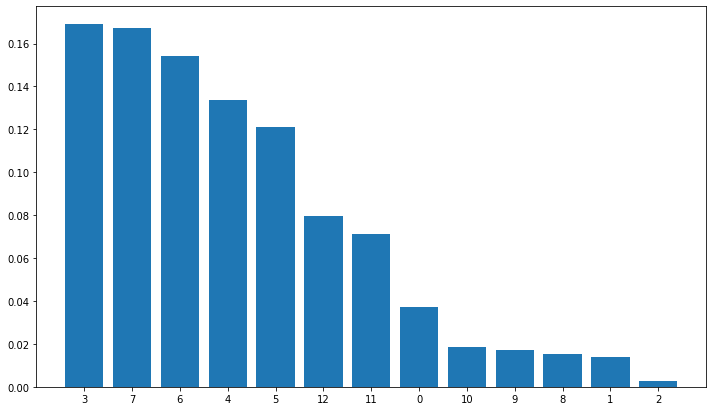

<Figure size 432x288 with 0 Axes>

In [49]:
# get the feature importances
importances = RF_model.feature_importances_

# sort the importances in descending order
indices = np.argsort(importances)[::-1]

# print the feature names and their importances
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# plot the feature importances
plt.figure(figsize=(12, 7))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#Saving the file
plt.savefig("Feature importances.jpeg")

Feature 0 - num_passengers\Feature 1 - sales_channel\Feature 2 - trip_type\Feature 3 - purchase_lead\Feature 4 - length_of_stay\Feature 5 - flight_hour\Feature 6 - route\Feature 7 - booking_origin\Feature 8 - wants_extra_baggage\Feature 9 - wants_preferred_seat\Feature 10 - wants_in_flight_meals\Feature 11 - flight_duration\Feature 12 - flight_day_num